In [440]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

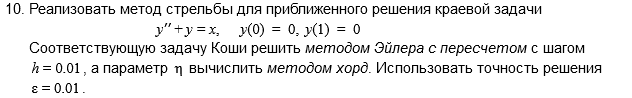

In [452]:
from IPython.display import Image
Image(filename='screenshot.png')

In [456]:
%%latex
Постоновка краевой задачи: 
\begin{equation*}
{y}'' + {y}' = x \Rightarrow {y}'' = x - {y}'
y(0) = 0, y(1) = 0
\end{equation*}


<IPython.core.display.Latex object>

In [ ]:
%%latex
Сделаем замену: 
\begin{equation*}
{y}'' + {y}' = x \Rightarrow {y}'' = x - {y}'
\end{equation*}

In [442]:
a = 0
b = 1
A = 0
B = 0

def f(x, u):
  return x - u[0]

In [443]:
def wrap_func(f):
  return lambda x, u: np.append(u[1:], f(x, u))

def recount(func, a, b, u, h):
  func = wrap_func(f)

  x = a
  u = np.array(u)
  res = [(x, u[0])]
  
  while x + h <= b:
    u = u + h / 2 * (func(x, u) + func(x + h, u + h * func(x, u)))
    x = x + h
    res.append((x, u[0]))
  
  return res

In [444]:
eta = 4
recount((lambda x, u: x - u[0]), a, b, [A, eta], 0.1)

[(0, 0),
 (0.1, 0.4),
 (0.2, 0.797),
 (0.30000000000000004, 1.1880225),
 (0.4, 1.57014985),
 (0.5, 1.9405535009375),
 (0.6, 2.296522363119375),
 (0.7, 2.635489987832533),
 (0.7999999999999999, 2.9550602996082875),
 (0.8999999999999999, 3.2530316211382635),
 (0.9999999999999999, 3.5274187499493665)]

In [445]:
def err(actual, res):
  return actual - res[-1][1] 

err(B, recount(f, a, b, [A, eta], 0.01))



-3.498105405171457

In [446]:
def new_param(eta_k, eta_k_prev, err_k, err_k_prev):
    return eta_k - (err_k * (eta_k - eta_k_prev)) / (err_k - err_k_prev)

In [447]:
def solve(f, a, b, A, B, eta0, eta1, h=0.1, eps=1e-5):
    
    result = [[eta0, err(B, recount(f, a, b, [A, eta0], h))],
              [eta1, err(B, recount(f, a, b, [A, eta1], h))]]
    
    _iter = 1
         
    while (np.abs(result[_iter][0] - result[_iter-1][0]) > eps):
        print(np.abs(result[_iter][0] - result[_iter-1][0]))
        current_eta = new_param(result[_iter][0], result[_iter - 1][0], result[_iter][1], result[_iter - 1][1])
        result.append([current_eta, err(B, recount(f, a, b, [A, current_eta], h))])
        _iter += 1
        
    return result
def solve_chord(f, a, b, A, B, eta_1, eta_2, h=0.1, eps=1e-5):
  eta = [eta_1, eta_2]
  hist = [recount(f, a, b, [A, eta_1], h), recount(f, a, b, [A, eta_2], h)]
  errors = [err(B, hist[0]), err(B, hist[1])]

  while abs(eta[-2] - eta[-1]) > eps:
    eta.append(eta[-1] - (eta[-1] - eta[-2]) * errors[-1] / (errors[-1] - errors[-2]))
    hist.append(recount(f, a, b, [A, eta[-1]], h))
    errors.append(err(B, hist[-1]))

  return hist[-1], hist



In [448]:
eta_1 = -1.3
eta_2 = (B - A) / (b - a)

print('eta_1 =', eta_1, '\terr =', err(B, recount(f, a, b, [A, eta_1], 0.1)))
print('eta_2 =', eta_2, '\terr =', err(B, recount(f, a, b, [A, eta_2], 0.1)))

eta_1 = -1.3 	err = 0.9376877082945141
eta_2 = 0.0 	err = -0.1575270833502113


In [449]:
res, hist = solve_chord(f, a, b, A, B, eta_1, eta_2, h=0.01, eps=0.01)

In [450]:
arr = np.round(np.array(res), 5)

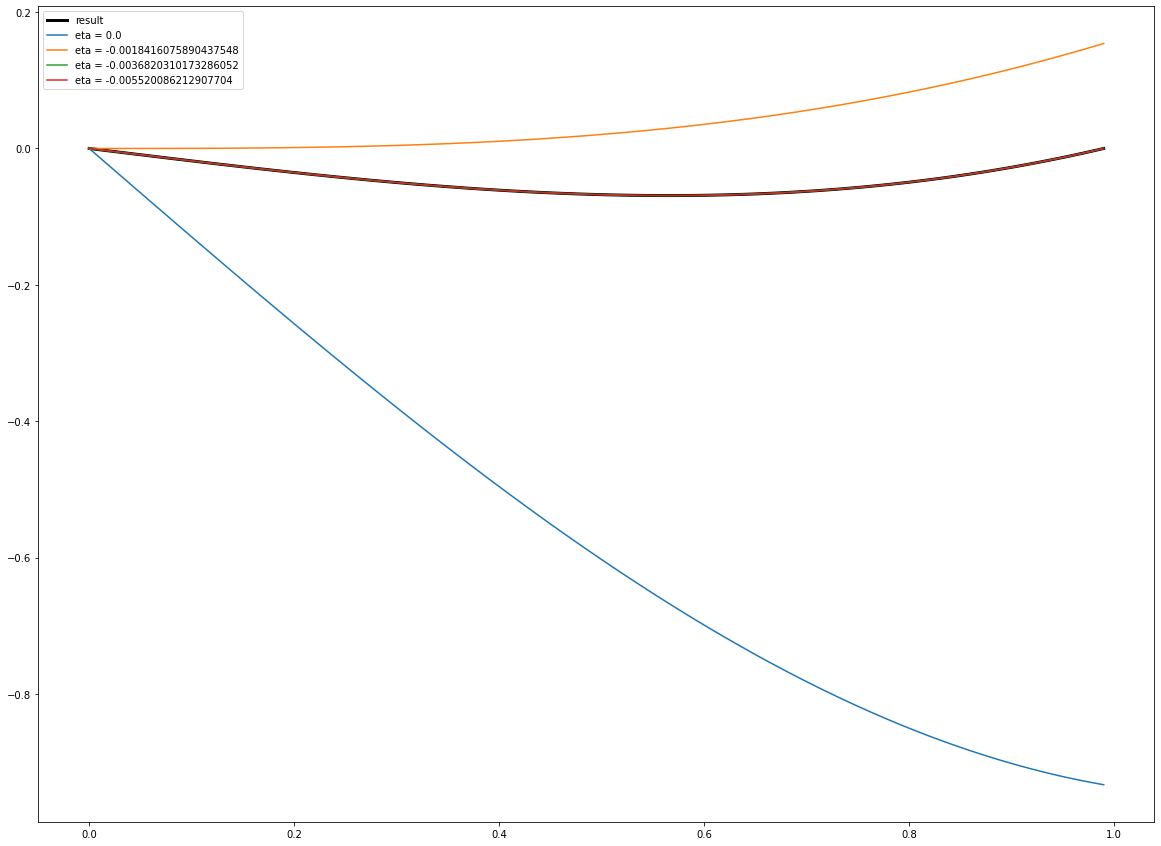

In [451]:
plt.rcParams["figure.figsize"] = (20, 15)

fig, ax = plt.subplots()

x = arr[:, 0]
y = arr[:, 1]
line = ax.plot(x, y, label='result', linewidth=3, color='black')

for item, eta_res in zip(hist, res): 
    item = np.round(np.array(item), 5)
    arr = np.array(r)
    print()
    x = item[:, 0]
    y = item[:, 1]
    line = ax.plot(x, y, label=f'eta = {eta_res[1]}')

ax.legend()
plt.show()